# COVID 19 project - Ross Rondeau

## The Data - us-counties.csv - Cleaning from timeseries format

### STEP 1: Import the data

In [2]:
import json
import pandas as pd
from os import path
import requests

DEBUG=False
FORCE_REFRESH=False

# Getting a data frame ready
df=pd.DataFrame()

url="https://covid19-lake.s3.us-east-2.amazonaws.com/rearc-usa-hospital-beds/json/usa-hospital-beds.geojson"

original_filename = "usa-hospital-beds"
all_csv_name = './cleaned/clean-usa-hospital-beds'

# This data is in the incorrect syntax to use without special tools, lets get it into standard DataFrame objects so we can interact with it as a CSV
if not path.exists(f"{all_csv_name}.csv") or FORCE_REFRESH:
    # Write the original CSV
    print(f"{all_csv_name}.csv does not exist, creating...")
    data = requests.get(url, allow_redirects=True)
    open(f"{original_filename}.geojson", 'wb').write(data.content)
    #open the file
    with open(f"{original_filename}.geojson", "r") as f: 
        for line in f: 
            dictionary = pd.Series(json.loads(line))
            df=df.append(dictionary,ignore_index=True)
    df['CNTY_FIPS'] = df['CNTY_FIPS'].astype(int)
    df.sort_values(by=['CNTY_FIPS'])
    df.to_csv(f'{all_csv_name}.csv',index=False)

# sanity check we have the correct data
required_columns = ['HOSPITAL_NAME', 'HOSPITAL_TYPE', 'HQ_ADDRESS', 'HQ_CITY', 'HQ_STATE', 'HQ_ZIP_CODE', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'NUM_LICENSED_BEDS', 'NUM_STAFFED_BEDS', 'NUM_ICU_BEDS', 'ADULT_ICU_BEDS', 'BED_UTILIZATION', 'Potential_Increase_In_Bed_Capac', 'AVG_VENTILATOR_USAGE']

usa_hospital_csv = pd.read_csv(f"{all_csv_name}.csv", usecols=required_columns)
usa_hospital_csv=usa_hospital_csv.sort_values(by=['CNTY_FIPS'])
print(usa_hospital_csv.head(20))
print(usa_hospital_csv.shape)

      ADULT_ICU_BEDS  AVG_VENTILATOR_USAGE  BED_UTILIZATION  CNTY_FIPS  \
3181             8.0                   4.0         0.581759        1.0   
6380             0.0                   0.0         0.955882        1.0   
4674             0.0                   0.0         0.765437        1.0   
191              9.0                   2.0         0.183673        1.0   
4936             0.0                   0.0         0.505137        1.0   
4680             0.0                   0.0         0.678312        1.0   
4688             0.0                   0.0         0.880105        1.0   
1963             4.0                   2.0         0.375562        1.0   
2167            10.0                   2.0         0.458931        1.0   
1739            14.0                   6.0         0.680301        1.0   
5154             9.0                   5.0         0.704703        1.0   
5745            11.0                   5.0         0.916530        1.0   
3935            10.0                  

### Lets select only certain columns and rows and write them out for later analysis

In [8]:
os.mkdir("./cleaned/state-hospital-beds/")
wi_csv_name = './cleaned/state-hospital-beds/wi_only-clean-usa-hospital-beds.csv'
ny_csv_name = './cleaned/state-hospital-beds/ny_only-clean-usa-hospital-beds.csv'
ca_csv_name = './cleaned/state-hospital-beds/ca_only-clean-usa-hospital-beds.csv'

wi_usa_hospital_csv=usa_hospital_csv[usa_hospital_csv.HQ_STATE.eq('WI')]
ny_usa_hospital_csv=usa_hospital_csv[usa_hospital_csv.HQ_STATE.eq('NY')]
ca_usa_hospital_csv=usa_hospital_csv[usa_hospital_csv.HQ_STATE.eq('CA')]

wi_usa_hospital_csv.to_csv(wi_csv_name,index=False)
ny_usa_hospital_csv.to_csv(ny_csv_name,index=False)
ca_usa_hospital_csv.to_csv(ca_csv_name,index=False)

### Problem 1 : WI Data has few missing values

In [9]:
import numpy as np

missing_values_count = wi_usa_hospital_csv.isnull().sum()
print(missing_values_count)

total_cells = np.product(wi_usa_hospital_csv.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Calculate missing data : {total_missing} / {total_cells} * 100")
print(f"{total_missing/total_cells:%} - total missing row values anywhere in the data")

ADULT_ICU_BEDS                     0
AVG_VENTILATOR_USAGE               4
BED_UTILIZATION                    9
CNTY_FIPS                          0
COUNTY_NAME                        0
FIPS                               0
HOSPITAL_NAME                      0
HOSPITAL_TYPE                      0
HQ_ADDRESS                         0
HQ_CITY                            0
HQ_STATE                           0
HQ_ZIP_CODE                        0
NUM_ICU_BEDS                       0
NUM_LICENSED_BEDS                  4
NUM_STAFFED_BEDS                   5
Potential_Increase_In_Bed_Capac    0
STATE_FIPS                         0
STATE_NAME                         0
dtype: int64
Calculate missing data : 22 / 2772 * 100
0.793651% - total missing row values anywhere in the data


### Problem 2 : NY Data has few missing values

In [10]:
import numpy as np
missing_values_count = ny_usa_hospital_csv.isnull().sum()
print(missing_values_count)

total_cells = np.product(ny_usa_hospital_csv.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Calculate missing data : {total_missing} / {total_cells} * 100")
print(f"{total_missing/total_cells:%} - total missing row values anywhere in the data")

ADULT_ICU_BEDS                      0
AVG_VENTILATOR_USAGE                6
BED_UTILIZATION                    37
CNTY_FIPS                           0
COUNTY_NAME                         0
FIPS                                0
HOSPITAL_NAME                       0
HOSPITAL_TYPE                       0
HQ_ADDRESS                          0
HQ_CITY                             0
HQ_STATE                            0
HQ_ZIP_CODE                         0
NUM_ICU_BEDS                        0
NUM_LICENSED_BEDS                  10
NUM_STAFFED_BEDS                   13
Potential_Increase_In_Bed_Capac     0
STATE_FIPS                          0
STATE_NAME                          0
dtype: int64
Calculate missing data : 66 / 4212 * 100
1.566952% - total missing row values anywhere in the data


### Problem 3 : CA has few missing values

In [11]:
import numpy as np
missing_values_count = ca_usa_hospital_csv.isnull().sum()
print(missing_values_count)

total_cells = np.product(ca_usa_hospital_csv.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Calculate missing data : {total_missing} / {total_cells} * 100")
print(f"{total_missing/total_cells:%} - total missing row values anywhere in the data")

ADULT_ICU_BEDS                      0
AVG_VENTILATOR_USAGE                2
BED_UTILIZATION                    66
CNTY_FIPS                           0
COUNTY_NAME                         0
FIPS                                0
HOSPITAL_NAME                       0
HOSPITAL_TYPE                       0
HQ_ADDRESS                          0
HQ_CITY                             0
HQ_STATE                            0
HQ_ZIP_CODE                         0
NUM_ICU_BEDS                        0
NUM_LICENSED_BEDS                   7
NUM_STAFFED_BEDS                   16
Potential_Increase_In_Bed_Capac     0
STATE_FIPS                          0
STATE_NAME                          0
dtype: int64
Calculate missing data : 91 / 8388 * 100
1.084883% - total missing row values anywhere in the data


### Solution 1 - 3 : Fill in the data  (example WI)

0.41740645971791496
0.4013419151306152
DISTRIBUTION BEFORE FILL


<AxesSubplot:>

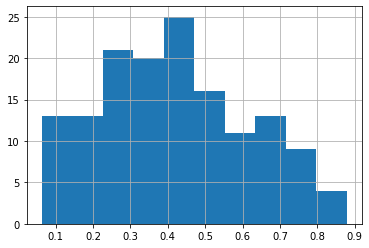

In [12]:
print(wi_usa_hospital_csv['BED_UTILIZATION'].mean())
print(wi_usa_hospital_csv['BED_UTILIZATION'].median())


print("DISTRIBUTION BEFORE FILL")
wi_usa_hospital_csv['BED_UTILIZATION'].hist()


DISTRIBUTION AFTER FILL
ADULT_ICU_BEDS                     0
AVG_VENTILATOR_USAGE               2
BED_UTILIZATION                    0
CNTY_FIPS                          0
COUNTY_NAME                        0
FIPS                               0
HOSPITAL_NAME                      0
HOSPITAL_TYPE                      0
HQ_ADDRESS                         0
HQ_CITY                            0
HQ_STATE                           0
HQ_ZIP_CODE                        0
NUM_ICU_BEDS                       0
NUM_LICENSED_BEDS                  2
NUM_STAFFED_BEDS                   3
Potential_Increase_In_Bed_Capac    0
STATE_FIPS                         0
STATE_NAME                         0
dtype: int64
Calculate missing data : 7 / 2736 * 100
0.255848% - total missing row values anywhere in the data


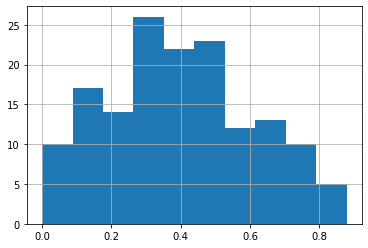

In [15]:
wi_usa_hospital_csv.BED_UTILIZATION.fillna(bfill,inplace=True)


print("DISTRIBUTION AFTER FILL")
wi_usa_hospital_csv['BED_UTILIZATION'].hist()

import numpy as np

missing_values_count = wi_usa_hospital_csv.isnull().sum()
print(missing_values_count)

total_cells = np.product(wi_usa_hospital_csv.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Calculate missing data : {total_missing} / {total_cells} * 100")
print(f"{total_missing/total_cells:%} - total missing row values anywhere in the data")

#### Possible solution woudl be to fill in the beds with the average for the area within the immediate FIPS location arond the hospital, its likely that hey are around the mean (.41) or median (.40)

### Problem 4 - Non Normal values, will take a look at normalizing this via PER CAPITA values later

91.29530201342281
40.0


<AxesSubplot:>

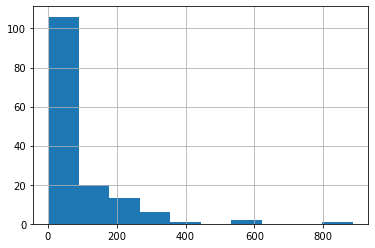

In [13]:
print(wi_usa_hospital_csv['NUM_STAFFED_BEDS'].mean())
print(wi_usa_hospital_csv['NUM_STAFFED_BEDS'].median())

wi_usa_hospital_csv['NUM_STAFFED_BEDS'].hist()

# Adding per state metrics

In [25]:
unique_states = set()
for index, row in usa_hospital_csv.iterrows():
    unique_states.add(row['STATE_NAME'])

unique_states=list(unique_states)
cleanedList = [x for x in unique_states if str(x) != 'nan']

grouped_usa_hospital_csv = usa_hospital_csv.groupby(['STATE_NAME'])['NUM_STAFFED_BEDS'].sum()

grouped_mean_utilization_usa_hospital_csv = usa_hospital_csv.groupby(['STATE_NAME'])['BED_UTILIZATION'].mean()

grouped_median_utilization_usa_hospital_csv = usa_hospital_csv.groupby(['STATE_NAME'])['BED_UTILIZATION'].median()

grouped_usa_hospital_csv.drop(labels=['Puerto Rico'],inplace=True)
grouped_mean_utilization_usa_hospital_csv.drop(labels=['Puerto Rico'],inplace=True)
grouped_median_utilization_usa_hospital_csv.drop(labels=['Puerto Rico'],inplace=True)

#print(grouped_usa_hospital_csv)
#print(grouped_mean_utilization_usa_hospital_csv)
#print(grouped_median_utilization_usa_hospital_csv)

new_df = pd.DataFrame
new_df = pd.merge(grouped_usa_hospital_csv,grouped_mean_utilization_usa_hospital_csv, right_index = True, left_index = True)

new_df = pd.merge(new_df, grouped_median_utilization_usa_hospital_csv, right_index=True, left_index=True, )

new_df = new_df.rename(columns={"BED_UTILIZATION_x": "BED_UTILIZATION_mean", "BED_UTILIZATION_y": "BED_UTILIZATION_median"})
print(new_df)

new_df.to_csv(f'./cleaned/{original_filename}-sumperstate.csv',index=True)
# for index, row in grouped_usa_hospital_csv.iterrows():
#     print(row)

# grouped_usa_hospital_csv
# #print(cleanedList)
# #print(len(cleanedList))

# state_hospital_info = pd.DataFrame()
# temp_dict = {}
# for state in cleanedList: 
#     for index, row in usa_hospital_csv.iterrows(): 
#         if row['STATE_NAME'] == state:
#             print(f'Found {state}')
#             temp_dict = {'state': state, }

        


                      NUM_STAFFED_BEDS  BED_UTILIZATION_mean  \
STATE_NAME                                                     
Alabama                        15110.0              0.477481   
Alaska                          1571.0              0.383236   
Arizona                        15798.0              0.516803   
Arkansas                        9873.0              0.427517   
California                     75332.0              0.539339   
Colorado                       11003.0              0.474719   
Connecticut                     7958.0              0.610685   
Delaware                        2696.0              0.708623   
District of Columbia            3264.0              0.732772   
Florida                        54804.0              0.592450   
Georgia                        23738.0              0.547774   
Hawaii                          3455.0              0.540094   
Idaho                           3387.0              0.376190   
Illinois                       32074.0  